# CPSC6300 Final Project - Socioeconomic Impacts on Healthcare Access Trends

In [1]:
#import modules
#These different modules will help to manipulate and visualize the data 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The 5 W Questions of this project: 

1. WHY did you choose the topic? What interests you about it?  Do you have an opinion about the issues involved?

As bioengineers, we are interested in how demographic factors may affect the access to healthcare and the quality of healthcare people may have access to and recieve. Of course, many resources have been devoted to these investigations before and some of the correlations are well understood, but we are interested to see if a random dataset that was not specfically devoted to these investigations could elucidate the same information. We feel that this information is important for us to understand as future healthcare workers. Personally, we both feel as though this information is vital to understanding access and quality of care and will be important in the efforts to improve these standards for all people. 

2. WHO are the information providers on this topic?  Who might publish information about it?  Who is affected by the topic?  Do you know of organizations or institutions affiliated with the topic?

There are a few major organizations devoted to the collection and publication of this kind of data. For example, the Center for Disease Control (CDC) and the World Health Organization (WHO) are two major organizations that collect and publish data regarding healthcare information. Specifically, the CDC publishes the National Health and Nutrition Examination Survey biannually and we used this data for our project. While this data affects all people, it may have a more significant impact on healthcare providers and those who are in charge of healthcare legislation and policy. 

3. WHAT are the major questions for this topic?  Is there a debate about the topic? Are there a range of issues and viewpoints to consider?

A major question surrounding our investigations is how different demographic factors affect the access to care and quality of care that people recieve. While there are not specific debates surrounding this information, it is important for this data to be collected and analyzed in order to visualize and understand healthcare trends over time. 


4. WHERE is your topic important: at the local, national or international level?  Arethere specific places affected by the topic?

Our topic is important at the national level in the United States, as the survey was conducted by government funding and surveyed US residents. The survey did not contain geographical location data, and the distribution of survey participants across the US is unclear. It may be important in future studies to record location to get a better understanding of how geographical location impacts the information recorded in the study. However, it is likely that this information is withheld from public datasets due to privacy regulations.  

5. WHEN is/was your topic important?  Is it a current event or an historical issue? Do you want to compare your topic by time periods?

This topic is a current issue that is constantly evolving. It would be useful to track this information over time to visualize how healthcare in the US evolves and how we can work to improve it. 



# Working with Demographics - Clean and Visualize Data

In the first step of this project, we first need to import the dataset. Our first focus will be to understand the demographics 
of the dataset, and we must import the data from the CDC and work to clean it. 

In [2]:
# Get the Data 
#This data breaks down demographic information including race, gender, age, and much more 
demo = pd.read_csv(r'https://raw.githubusercontent.com/cdhumme/notebooks/master/demographic.csv')


In [3]:
#vizualize the data
demo.head()


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


This allows us to see that the categorical information contained in this dataset has been encoded using numbers with each SEQN number representing an individual who participated in the study. In addition, we can see that the names of each column are acronyms of a longer title and they are not intuitively clear to the user. In the next steps, we must work to rename the columns for clarity. 

Below is a dictionary of the encoded column names that our dataset will choose to focus on: 



RIDAGEYR: Age in years, at the time of the screening interview, is reported for survey participants between the ages of 1 and 79 years of age. All responses of participants aged 80 years and older are coded as ‘80.’ The reporting of age in single years for adults 80 years and older was determined to be a disclosure risk. In NHANES 2013-2014, the weighted mean age for participants 80 years and older is 84 years. RIDAGEYR was calculated based on the participant’s date of birth. In rare cases, the actual date of birth was missing but the participant’s age in years was provided, then the reported age was used.

RIDRETH3: This is the race-ethnicity variable included in the demographics file since the 2011-2012 survey cycle to accommodate the oversample of non-Hispanic Asian. It was derived from responses to the survey questions on race and Hispanic origin. Respondents who self-identified as “Mexican American” were coded as such (i.e., RIDRETH3=1) regardless of their other race-ethnicity identities.  Otherwise, self-identified “Hispanic” ethnicity would result in code “2, Other Hispanic” in the RIDRETH3 variable. All other non-Hispanic participants would then be categorized based on their self-reported races: non-Hispanic white (RIDRETH3=3), non-Hispanic black (RIDRETH3=4), non-Hispanic Asian (RIDRETH3=6), and other non-Hispanic races including non-Hispanic multiracial (RIDRETH3=7).  Code “5” was not used in RIDRETH3.

DMDBORN4: Due to the concerns of disclosure risk, starting in 2011, country of birth was recoded into two categories: 1) Born in 50 U.S. states or Washington, DC; and 2) Born in other countries, including U.S. territories.

DMDCITZN: Citizenship status is reported using two codes: 1) Citizen by birth or naturalization; or 2) Not a citizen of the U.S. Persons who were born in the U.S. or U.S. territories who acquired citizenship at birth were coded as U.S. citizens.

DMDMARTL: The marital status question was asked of persons 14 years of age and older. Due to disclosure risks, marital status is only released for persons 20 years of age and older.

DMDYRSUS: This variable is the number of years the participant has lived in the United States. Participants who were born outside the U.S. were asked the month and year when they came to the U.S. to live (DMQ.160). A small number of records were imputed because the participant did not report the month of their arrival. A month value of 7 (July) was used to impute DMDYRSUS for these respondents. The responses to the question were recoded into 9 categories ranging from less than one year to 50 years or more.

DMDEDUC2: This variable is the highest grade or level of education completed by adults 20 years and older. The response categories are: less than 9th grade education, 9-11th grade education (includes 12th grade and no diploma), High school graduate/GED, some college or associates (AA) degree, and college graduate or higher.

INDFMPIR: This variable is the ratio of family income to poverty. The Department of Health and Human Services (HHS) poverty guidelines were used as the poverty measure to calculate this ratio. INDFMPIR was calculated by dividing family (or individual) income by the poverty guidelines specific to the survey year. The value was not computed if the respondent only reported income as < $20,000 or ≥ $20,000. If family income was reported as a more detailed category, the midpoint of the range was used to compute the ratio. Values at or above 5.00 were coded as 5.00 or more because of disclosure concerns. The values were not computed if the income data was missing.

INDHHIN2: This variable indicates the total annual household income in dollar ranges. If a household was comprised of a single family or individual, the reported family income was used as household income as well. When more than one family, or one or more unrelated individuals, or a combination of a family and unrelated individuals resided in the household, the total household income was calculated by the sum of all reported family and/or individual income values. Please see above notes on variable INDFMIN2 for details on how the amounts of family income were determined.



Using the above categories, we worked to clean the data to include only these specific datapoints, as we were specifically 
interested in topics like country of birth, income, and poverty. 

In [4]:
#Clean the data to include only specific categories, as outline above
demo.drop(demo.columns.difference(['SEQN','RIAGENDR','RIDRETH3', 'DMDBORN4', 'DMDCITZN', 'DMDMARTL', 'DMDYRSUS', 'DMDEDUC2', 'INDFMPIR', 'INDHHIN2'  ]), 1, inplace=True)
demo



,SEQN,RIAGENDR,RIDRETH3,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC2,DMDMARTL,INDHHIN2,INDFMPIR
0,73557,1,4,1,1.0,NaN,3.0,4.0,4.0,0.84
1,73558,1,3,1,1.0,NaN,3.0,1.0,7.0,1.78
2,73559,1,3,1,1.0,NaN,4.0,1.0,10.0,4.51
3,73560,1,3,1,1.0,NaN,NaN,NaN,9.0,2.52
4,73561,2,3,1,1.0,NaN,5.0,1.0,15.0,5.00
...,...,...,...,...,...,...,...,...,...,...
10170,83727,1,2,1,1.0,NaN,5.0,5.0,77.0,NaN
10171,83728,2,1,1,1.0,NaN,NaN,NaN,8.0,1.95
10172,83729,2,4,2,1.0,6.0,5.0,3.0,7.0,3.66
10173,83730,1,2,1,1.0,NaN,NaN,NaN,6.0,1.05


This cleaned version of the data shows us that there are a few columns with a significant amount of missing data. Below, we worked to determine how many datapoints were missing to see if the column should be removed as a whole. 

In [5]:
#Find out how many missing values are in columns 
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      10175 non-null  int64  
 1   RIAGENDR  10175 non-null  int64  
 2   RIDRETH3  10175 non-null  int64  
 3   DMDBORN4  10175 non-null  int64  
 4   DMDCITZN  10171 non-null  float64
 5   DMDYRSUS  1908 non-null   float64
 6   DMDEDUC2  5769 non-null   float64
 7   DMDMARTL  5769 non-null   float64
 8   INDHHIN2  10042 non-null  float64
 9   INDFMPIR  9390 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 795.0 KB


Based on these results, it looks like DMDYRSUS (years in the US), DMDEDUC2 (education),
and DMDMARTL (marital status) have a lot of missing information. DMDYRSUS has the most missing information, so we chose to drop this column from the dataset

In [6]:
#Drop DMDYRSUS from the dataset
demo.drop('DMDYRSUS', inplace = True, axis = 1)


The next step in cleaning the data is to rid of rows that have missing information. The survery conducted by the CDC gave participants the option to refuse to answer questions or to chose "I don't know". This information will not be useful in our analysis and we will remove replace these values with "NaN" for clarity

In [7]:
#Remove rows with missing or refused data. 
# Refused data is often denoted by 7,9,77,99 or '.'

demo['DMDBORN4'] = demo['DMDBORN4'].replace(77, np.NaN )
demo['DMDBORN4'] = demo['DMDBORN4'].replace(99, np.NaN )
demo['DMDCITZN'] = demo['DMDCITZN'].replace(9, np.NaN )
demo['DMDCITZN'] = demo['DMDCITZN'].replace(7, np.NaN )
demo['DMDEDUC2'] = demo['DMDEDUC2'].replace(9, np.NaN )
demo['DMDEDUC2'] = demo['DMDEDUC2'].replace(7, np.NaN )
demo['DMDMARTL'] = demo['DMDMARTL'].replace(77, np.NaN )
demo['DMDMARTL'] = demo['DMDMARTL'].replace(99, np.NaN )
demo['INDHHIN2'] = demo['INDHHIN2'].replace(77, np.NaN )
demo['INDHHIN2'] = demo['INDHHIN2'].replace(99, np.NaN )
demo['INDHHIN2'] = demo['INDHHIN2'].replace(12, np.NaN )
demo['INDHHIN2'] = demo['INDHHIN2'].replace(13, np.NaN )


In order to work with this data, it may be beneficial to have two versions of the dataset, one with numerical and one with categorical data. For graphing and vizualization purposes, it would be useful to have the data in categories instead of enocded into integers so that proper category titles can be vizualized. We will work to replace the integer values with categorical values.  

In [8]:
#All of the data is encoded by numbers that correspond to categorical data. To fix this, the following code replaces the 
# numbers with categorical values that will make the data easier to graph and interpret 

#Rename all of the columns in demo

#Gender
demo['RIAGENDR'] = demo['RIAGENDR'].replace(1 ,'Male')
demo['RIAGENDR'] = demo['RIAGENDR'].replace(2 ,'Female')

#Race
demo['RIDRETH3'] = demo['RIDRETH3'].replace(1 ,'Mexican-American')
demo['RIDRETH3'] = demo['RIDRETH3'].replace(2 ,'Other Hispanic')
demo['RIDRETH3'] = demo['RIDRETH3'].replace(3 ,'White')
demo['RIDRETH3'] = demo['RIDRETH3'].replace(4 ,'Black')
demo['RIDRETH3'] = demo['RIDRETH3'].replace(6 ,'Asian')
demo['RIDRETH3'] = demo['RIDRETH3'].replace(7 ,'Other / Multiracial')

#Country of Birth 
demo['DMDBORN4'] = demo['DMDBORN4'].replace(1 ,'United States')
demo['DMDBORN4'] = demo['DMDBORN4'].replace(2 ,'Other Country')
demo['DMDBORN4'] = demo['DMDBORN4'].replace(77,np.NaN)
demo['DMDBORN4'] = demo['DMDBORN4'].replace(99,np.NaN)

#Citizenship 
demo['DMDCITZN'] = demo['DMDCITZN'].replace(1 ,'Citizen by birth / naturalization')
demo['DMDCITZN'] = demo['DMDCITZN'].replace(2,'Not a US citizen')
demo['DMDCITZN'] = demo['DMDCITZN'].replace(7,np.NaN)
demo['DMDCITZN'] = demo['DMDCITZN'].replace(9,np.NaN)

#Education
demo['DMDEDUC2'] = demo['DMDEDUC2'].replace(1 ,'Less than 9th grade')
demo['DMDEDUC2'] = demo['DMDEDUC2'].replace(2,'9-11th grade')
demo['DMDEDUC2'] = demo['DMDEDUC2'].replace(3,'High school graduate/GED or equivalent')
demo['DMDEDUC2'] = demo['DMDEDUC2'].replace(4,'Some college or AA degree')
demo['DMDEDUC2'] = demo['DMDEDUC2'].replace(5,'College graduate or above')
demo['DMDEDUC2'] = demo['DMDEDUC2'].replace(7,np.NaN)
demo['DMDEDUC2'] = demo['DMDEDUC2'].replace(9,np.NaN)

#Martial Status
demo['DMDMARTL'] = demo['DMDMARTL'].replace(1,'Married')
demo['DMDMARTL'] = demo['DMDMARTL'].replace(2,'Widowed')
demo['DMDMARTL'] = demo['DMDMARTL'].replace(3,'Divorced')
demo['DMDMARTL'] = demo['DMDMARTL'].replace(4,'Separated')
demo['DMDMARTL'] = demo['DMDMARTL'].replace(5,'Never Married')
demo['DMDMARTL'] = demo['DMDMARTL'].replace(6,'Living with Partner')
demo['DMDMARTL'] = demo['DMDMARTL'].replace(77,np.NaN)
demo['DMDMARTL'] = demo['DMDMARTL'].replace(99,np.NaN)
#Income
demo['INDHHIN2'] = demo['INDHHIN2'].replace(1,'$ 0 to $ 4,999')
demo['INDHHIN2'] = demo['INDHHIN2'].replace(2,'$ 5,000 to $ 9,999')
demo['INDHHIN2'] = demo['INDHHIN2'].replace(3,'$10,000 to $14,999')
demo['INDHHIN2'] = demo['INDHHIN2'].replace(4,'$15,000 to $19,999')
demo['INDHHIN2'] = demo['INDHHIN2'].replace(5,'$20,000 to $24,999')
demo['INDHHIN2'] = demo['INDHHIN2'].replace(6,'$25,000 to $34,999')
demo['INDHHIN2'] = demo['INDHHIN2'].replace(7,'$35,000 to $44,999')
demo['INDHHIN2'] = demo['INDHHIN2'].replace(8,'$45,000 to $54,999')
demo['INDHHIN2'] = demo['INDHHIN2'].replace(9,'$55,000 to $64,999')
demo['INDHHIN2'] = demo['INDHHIN2'].replace(10,'$65,000 to $74,999')
demo['INDHHIN2'] = demo['INDHHIN2'].replace(14,'$75,000 to $99,999')
demo['INDHHIN2'] = demo['INDHHIN2'].replace(15,'$100,000 and Over')
demo['INDHHIN2'] = demo['INDHHIN2'].replace(77,np.NaN)
demo['INDHHIN2'] = demo['INDHHIN2'].replace(99,np.NaN)

demo.columns = ['ID Number', 'Gender' , 'Race', 'Country of Birth' , 'Citizenship' , 'Education', 'Marital' , 'Income', 'Poverty']
demo

,ID Number,Gender,Race,Country of Birth,Citizenship,Education,Marital,Income,Poverty
0,73557,Male,Black,United States,Citizen by birth / naturalization,High school graduate/GED or equivalent,Separated,"$15,000 to $19,999",0.84
1,73558,Male,White,United States,Citizen by birth / naturalization,High school graduate/GED or equivalent,Married,"$35,000 to $44,999",1.78
2,73559,Male,White,United States,Citizen by birth / naturalization,Some college or AA degree,Married,"$65,000 to $74,999",4.51
3,73560,Male,White,United States,Citizen by birth / naturalization,NaN,NaN,"$55,000 to $64,999",2.52
4,73561,Female,White,United States,Citizen by birth / naturalization,College graduate or above,Married,"$100,000 and Over",5.00
...,...,...,...,...,...,...,...,...,...
10170,83727,Male,Other Hispanic,United States,Citizen by birth / naturalization,College graduate or above,Never Married,NaN,NaN
10171,83728,Female,Mexican-American,United States,Citizen by birth / naturalization,NaN,NaN,"$45,000 to $54,999",1.95
10172,83729,Female,Black,Other Country,Citizen by birth / naturalization,College graduate or above,Divorced,"$35,000 to $44,999",3.66
10173,83730,Male,Other Hispanic,United States,Citizen by birth / naturalization,NaN,NaN,"$25,000 to $34,999",1.05


Now that we have reowrked the integer values, it will be easy to graph and give an overall breakdown visualization of the data. The following code graphs all of the demographic data. 

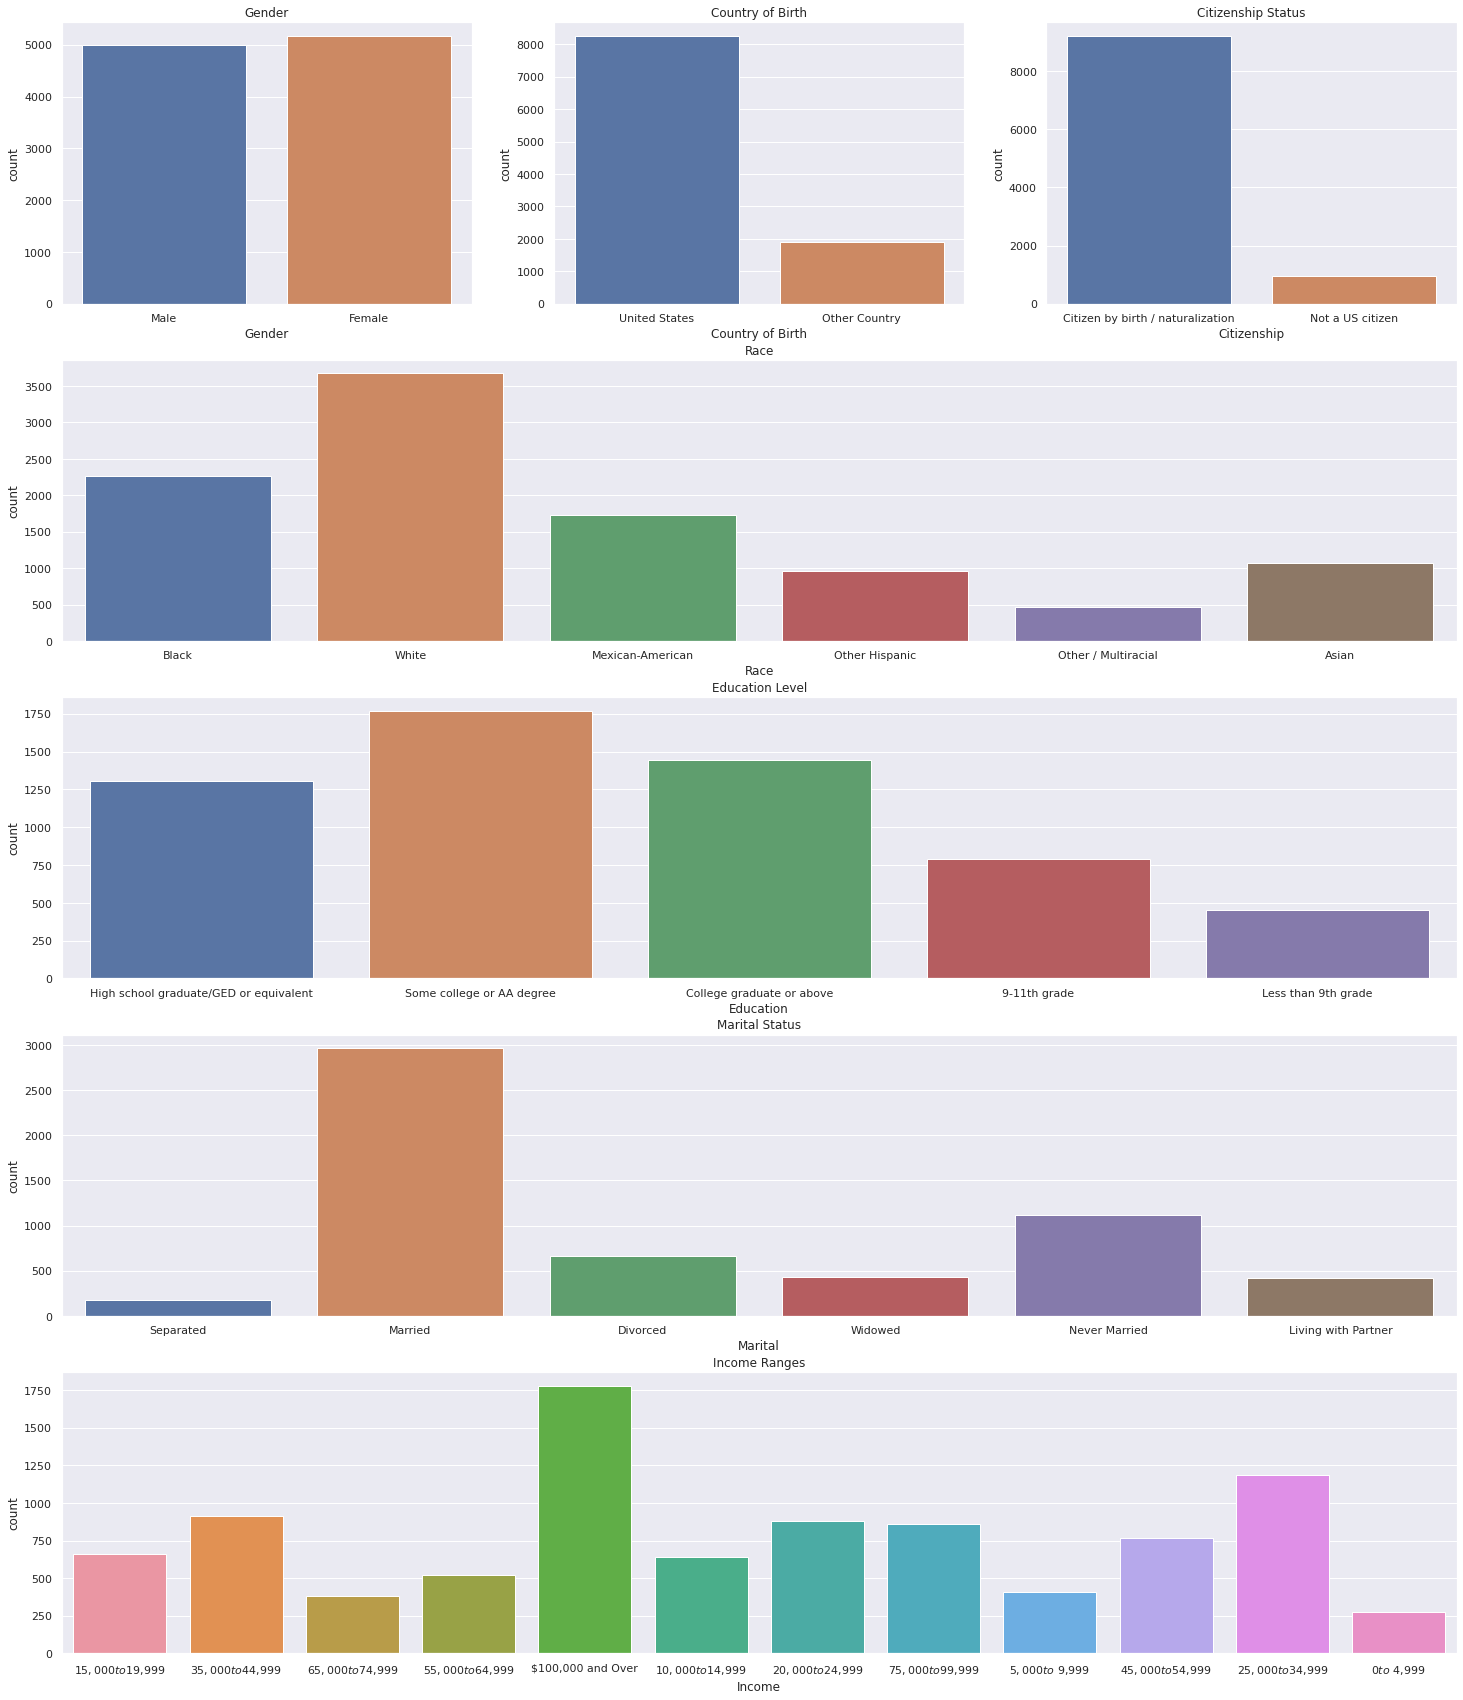

In [9]:
figure, ax = plt.subplots(3, 5, figsize=(25,30))
import matplotlib.pylab as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set()
gender = sns.countplot(demo['Gender'], ax=plt.subplot(5,3,1)).set_title("Gender")
birth = sns.countplot(demo['Country of Birth'], ax=plt.subplot(5,3,2)).set_title("Country of Birth")
citizenship = sns.countplot(demo['Citizenship'], ax=plt.subplot(5,3, 3)).set_title("Citizenship Status")

race = sns.countplot(demo['Race'], ax=plt.subplot(5,3,(4,6))).set_title("Race")
education = sns.countplot(demo['Education'], ax=plt.subplot(5,3,(7,9))).set_title("Education Level")
marital = sns.countplot(demo['Marital'], ax=plt.subplot(5,3,(10,12))).set_title("Marital Status")
income = sns.countplot(demo['Income'], ax=plt.subplot(5,3,(13,15))).set_title("Income Ranges")


figure.savefig('Demographics.png')

This gives us a great sense of how our data is broken down. We can see that the ratio of male to female is close to 1:1, so this may help to remove any gender bias in future work with gender. In addition, we can see that there is not as even of a distribution with regard to race, so it may be important to normalize future work with this data set. 

# Visualization and Interpretation

Next, we would like to create some graphs to help visualize different relationships between the demopgraphic data 

First, let's take a look at how income is broken down by race

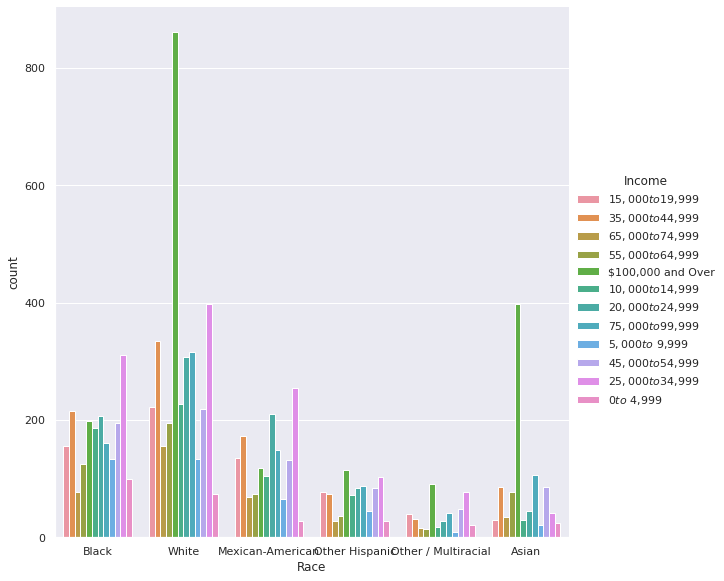

In [10]:
g = sns.catplot(x="Race", hue="Income", data=demo, kind="count", height=8)


This chart groups race together and displays the count of each income bracket within that race. We can see that people of White
race appear to have the greatest number of people earning $100,000 and over. However, we have to remember that this study also had more people of white race surveyed. 

In attempt to better visualzie this, lets create a similar graph that breaks down income into race brackets. This time, we will normalize the data in order to get a better representation of the spread. 

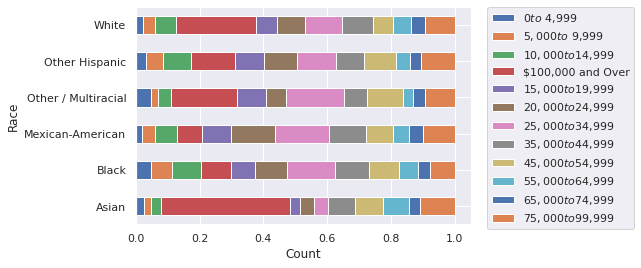

In [11]:
df = (pd.crosstab(demo['Race'], demo['Income'] , normalize= 'index'))
ax = df.plot.barh(stacked=True)
ax.set_xlabel('Count')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

This graphs shows us the importance of normalizing the data. While the previous graph might have lead us to believe the White race had the most amount of people making $100,000 and over, we can actually see that the Asian race has the most amount of people in this bracket when the data is normalized to account for the differences in the number of people grouped into each race.

Let's continue to look at other visual interpretations of the data before we begin to calculate correlation statistics and attempt a prediction model. We have already broken down the data into income by race. To better understand these results, let's investigate how education level is broken down by race see if there are any visual indications of how income depends on education level.

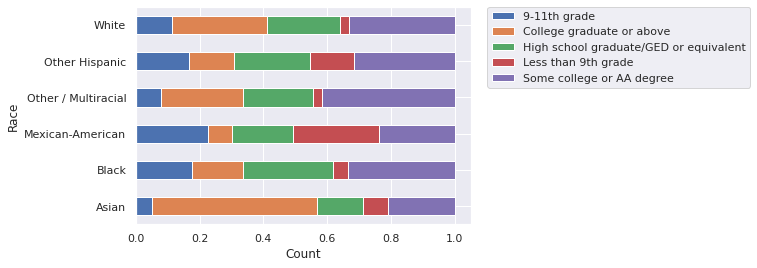

In [12]:
df = (pd.crosstab(demo['Race'], demo['Education'] , normalize= 'index'))
ax = df.plot.barh(stacked=True)
ax.set_xlabel('Count')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

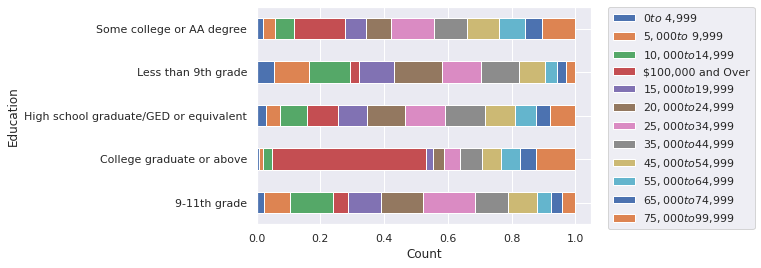

In [13]:
df = (pd.crosstab(demo['Education'], demo['Income'] , normalize= 'index'))
ax = df.plot.barh(stacked=True)
ax.set_xlabel('Count')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

The above graphs confirm what would be expected, the race bracket with the highest percentage of people in the highest income bracket also has the highest prcentage of people that are college graduates or above. We then broke down income by education level to see that, as expected, college graduate or above has the highest amount of earners $100,000 or above. 

While we have visually investiagted the main demographic areas of interest for our project, it may be interesting to visualize other factors of the data set to illuminate other interesting trends. The graphs below work to break down the data set in ways that may not be particularly pertinent to the issues we are investigating, but may provide useful information for further investigation. 

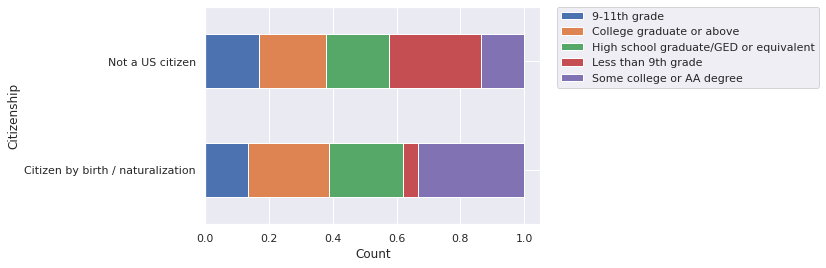

In [14]:
df = (pd.crosstab(demo['Citizenship'], demo['Education'] , normalize= 'index'))
ax = df.plot.barh(stacked=True)
ax.set_xlabel('Count')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

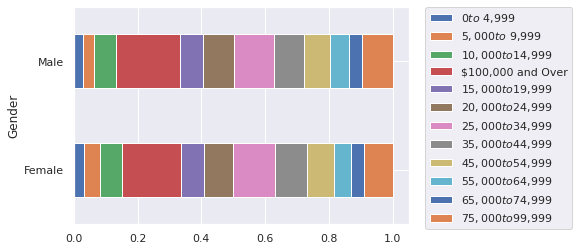

In [15]:
df = pd.crosstab(demo['Gender'], demo['Income'],normalize= 'index')
ax = df.plot.barh(stacked=True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

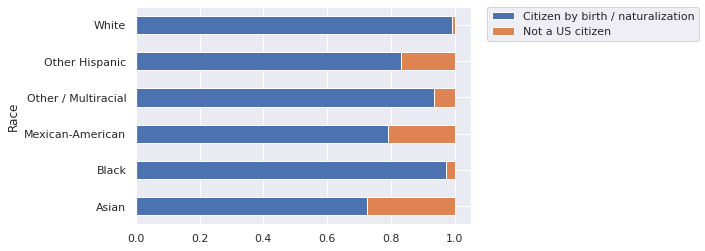

In [16]:
df = pd.crosstab(demo['Race'], demo['Citizenship'],normalize= 'index')
ax = df.plot.barh(stacked=True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

These graphs give some insight into other categories such as how citizenship impacts education level, how income is affected by gender, and what percent of each race represented is a US citizen. These different relationships may be interesting for future data science analysis and prediction models. 

Below, we converted the data into categorical data types for ease of use for the future. 

In [17]:
cat_cols = list(demo.select_dtypes(include=['object']).columns)
for i in cat_cols:
    demo[i] = demo[i].astype('category')

demo.dtypes



ID Number              int64
Gender              category
Race                category
Country of Birth    category
Citizenship         category
Education           category
Marital             category
Income              category
Poverty              float64
dtype: object

In [18]:
demo['Race'].value_counts()

White                  3674
Black                  2267
Mexican-American       1730
Asian                  1074
Other Hispanic          960
Other / Multiracial     470
Name: Race, dtype: int64

# Cleaning and Visualizing Subsequent Datasets

Next, lets grab some more data that will help us accomplish our goals. We will grab occupation data, data that discusses access to healthcare, and insurance information. The CDC dataset also had mental health information available, and we decided to grab this dataset as well to observe any potential correlations. 

In [19]:
#This data includes questionare answers as part of the survey distributed by the CDC
quest = pd.read_csv(r'https://raw.githubusercontent.com/cdhumme/notebooks/master/questionnaire.csv')

In [20]:
#Examine the data
quest.head()

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


First, let's grab and clean the mental health data

In [21]:
#Get the mental health data
quest = pd.read_csv(r'https://raw.githubusercontent.com/cdhumme/notebooks/master/questionnaire.csv')
ment = quest[['DPQ010','DPQ020']]

In [22]:
#Examine the mental health data
ment.head()

,DPQ010,DPQ020
0,1.0,0.0
1,2.0,0.0
2,0.0,0.0
3,NaN,NaN
4,2.0,1.0


In [23]:
#Replace refused or unknown survey answers
ment = ment.replace(9, np.NaN)
ment = ment.replace(7, np.NaN)


Below explains the two categories for the mental health data and their respective numerical values 

DPQ010 - Have little interest in doing things
0	Not at all		
1	Several days	
2	More than half the days	
3	Nearly every day	
7	Refused	
9	Don't know		
.	Missing

DPQ020 - Feeling down, depressed, or hopeless

0	Not at all		
1	Several days		
2	More than half the days		
3	Nearly every day		
7	Refused		
9	Don't know		
.	Missing



In [24]:
#Rename the mental health columns 
ment.columns = ['Have Little Interest in Things', 'Feeling Depressed' ]
ment

,Have Little Interest in Things,Feeling Depressed
0,1.0,0.0
1,2.0,0.0
2,0.0,0.0
3,NaN,NaN
4,2.0,1.0
...,...,...
10170,0.0,0.0
10171,NaN,NaN
10172,NaN,NaN
10173,NaN,NaN


Now that we have the cleaned mental health data, let's create some graphs to investigate the intersection of it and other data

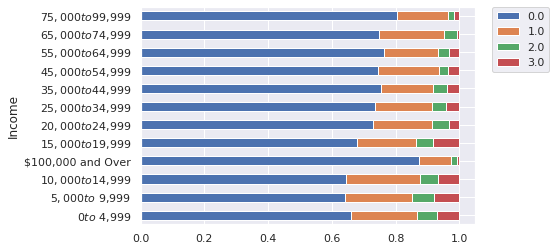

In [25]:
df = pd.crosstab(demo['Income'], ment['Feeling Depressed'],normalize= 'index')
ax = df.plot.barh(stacked=True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Here we can see that income appears to be correlated to how often feelings of depresion are experienced. People making over $100,000 have a higher prevelance of not feeling depressed at all (value of 0), while people in the lower income brackets have a higher prevelance of people feeling depressed "nearly every day" (value of 3). 

# Occupation and Health Access 

Next, we have to filter the questionnaire dataset into smaller sections of interest. Here, we extract the occupational data by pulling columns with codes corresponding to occupational information. The codes of interest are below:

OCQ180 - Hours worked last week at all jobs 1-120: range of hours 77777: Refused 99999: Don't Know

OCQ210 - Usually work 35 or more hours per week 1: yes 2: no 7: refused 9: don't know

OCQ260: Description of job/work situation 1: An employee of a private company, business, or individual for wages, salary, or commission 2: A federal government employee 3: A state government employee 4: A local government employee 5: Self-employed in own business, professional practice or farm 6: Working without pay in family business or farm 77: Refused 99: Don't know

OCQ380: Main reason did not work last week 1: Taking care of house or family 2: Going to school 3: retired 4: unable to work for health reasons 5: on layoff 6: disabled 7: other

OCD150: Type of work done last week 1: working at a job or business 2: with a job or business but not at work 3: looking for work 4: not working at a job or business

OCD395: Duration of longest job (months) 1-720: range of values 0: less than one month





In [26]:
#Grab the occupation data from the questionarre 
filter_col = [col for col in quest if col.startswith('OCQ')]
filter_col.extend([col for col in quest if col.startswith('OCD')])
occ = quest[filter_col]
occ = occ[['OCQ260', 'OCQ380']]
print(occ)

       OCQ260  OCQ380
0         NaN     3.0
1         1.0     NaN
2         NaN     3.0
3         NaN     NaN
4         NaN     4.0
...       ...     ...
10170     1.0     NaN
10171     NaN     NaN
10172     1.0     NaN
10173     NaN     NaN
10174     NaN     NaN

[10175 rows x 2 columns]


Like we did with the demographic data set, we will rename the columns of the occupation dataframe as well

In [27]:
#Description of Job / Work situation
occ['OCQ260'] = occ['OCQ260'].replace(77, np.NaN)
occ['OCQ260'] = occ['OCQ260'].replace(1, "Business Employee")
occ['OCQ260'] = occ['OCQ260'].replace(2, 'Federal Gov.')
occ['OCQ260'] = occ['OCQ260'].replace(3, 'State Gov.')
occ['OCQ260'] = occ['OCQ260'].replace(4, 'Local Gov.')
occ['OCQ260'] = occ['OCQ260'].replace(5, 'Self-Employed')
occ['OCQ260'] = occ['OCQ260'].replace(6, 'Family Business / Farm')


#Reason not working
occ['OCQ380'] = occ['OCQ380'].replace(77, np.NaN)  
occ['OCQ380'] = occ['OCQ380'].replace(1, 'Care of House')
occ['OCQ380'] = occ['OCQ380'].replace(2, 'Going to School')
occ['OCQ380'] = occ['OCQ380'].replace(3, 'Retired')
occ['OCQ380'] = occ['OCQ380'].replace(4, 'Health Reasons')
occ['OCQ380'] = occ['OCQ380'].replace(5, 'Lay-off')
occ['OCQ380'] = occ['OCQ380'].replace(6, 'Disabled')
occ['OCQ380'] = occ['OCQ380'].replace(7, 'Other')


In [28]:
occ

,OCQ260,OCQ380
0,NaN,Retired
1,Business Employee,NaN
2,NaN,Retired
3,NaN,NaN
4,NaN,Health Reasons
...,...,...
10170,Business Employee,NaN
10171,NaN,NaN
10172,Business Employee,NaN
10173,NaN,NaN


Here, we extract the access to care data by pulling columns with codes corresponding to care access information. The codes of interest are below:

HUQ010: General Health Condition
    1: excellent
    2: very good
    3: good
    4: fair
    5: poor
   
HUQ030: Routine place to go for healthcare?
    1: yes
    2: there is no place
    3: there is more than one place
   
HUQ041: Type of place most often go for healthcare
    1: clinic or health center
    2: doctors office or HMO
    3: hospital emergency room
    4: hospital outpatient department
    5: some other place
    6: doesnt go to one place most often
   
HUQ051: # times receive healthcare over past year
    0: none
    1: 1
    2: 2-3
    3: 4-5
    4: 6-7
    5: 8-9
    6: 10-12
    7: 13-15
    8: 16 or more
   
HUQ061: how long since last healthcare visit?
    1: 6 months or less
    2: 6 months-1yr
    3: 1-2 yr
    4: 2-5 yr
    5: more than 5 years
    6: never
   
HUQ090: seen mental health professional in last year?
    1: yes
    2: no





In [29]:
filter_col1 = [col for col in quest if col.startswith('HUQ')]
filter_col1.extend([col for col in quest if col.startswith('HUD')])
care = quest[filter_col1]
care = care[['HUQ010', 'HUQ041', 'HUQ051', 'HUQ061', 'HUQ090']]
care

,HUQ010,HUQ041,HUQ051,HUQ061,HUQ090
0,2,2.0,5,NaN,2.0
1,4,2.0,5,NaN,2.0
2,3,2.0,2,NaN,2.0
3,2,NaN,1,NaN,2.0
4,5,2.0,4,NaN,2.0
...,...,...,...,...,...
10170,4,NaN,1,NaN,2.0
10171,2,2.0,0,2.0,NaN
10172,3,2.0,5,NaN,2.0
10173,1,2.0,0,2.0,2.0


In [30]:
#Visualize the statistic summary for the occupation data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
summary_statistics = occ.describe()
summary_statistics

,OCQ260,OCQ380
count,3439,2815
unique,6,7
top,Business Employee,Retired
freq,2846,1113


In [31]:
#Rename the columns for occ
occ.columns = ['job_des' , 'reason_no_work']
occ

,job_des,reason_no_work
0,NaN,Retired
1,Business Employee,NaN
2,NaN,Retired
3,NaN,NaN
4,NaN,Health Reasons
...,...,...
10170,Business Employee,NaN
10171,NaN,NaN
10172,Business Employee,NaN
10173,NaN,NaN


In [32]:
#Replace integer encoded values with categorical titles

#General Health Condition
care['HUQ010'] = care['HUQ010'].replace(7, np.NaN)  
care['HUQ010'] = care['HUQ010'].replace(9, np.NaN)
care['HUQ010'] = care['HUQ010'].replace(1, 'Excellent')
care['HUQ010'] = care['HUQ010'].replace(2, 'Very Good')
care['HUQ010'] = care['HUQ010'].replace(3, 'Good')
care['HUQ010'] = care['HUQ010'].replace(4, 'Fair')
care['HUQ010'] = care['HUQ010'].replace(5, 'Poor')

#Type of place to go for healthcare
care['HUQ041'] = care['HUQ041'].replace(77, np.NaN)  
care['HUQ041'] = care['HUQ041'].replace(1, 'Clinic or Health Center')
care['HUQ041'] = care['HUQ041'].replace(2, 'Doctors Office')
care['HUQ041'] = care['HUQ041'].replace(3, 'Emergency Room')
care['HUQ041'] = care['HUQ041'].replace(4, 'Hospital Outpatient')
care['HUQ041'] = care['HUQ041'].replace(5, 'Some other place')
care['HUQ041'] = care['HUQ041'].replace(6, 'No place')

#Number of time received health care over past year
care['HUQ051'] = care['HUQ051'].replace(77, np.NaN)
care['HUQ051'] = care['HUQ051'].replace(99, np.NaN)
care['HUQ051'] = care['HUQ051'].replace(1, '1')
care['HUQ051'] = care['HUQ051'].replace(2, '2-3')
care['HUQ051'] = care['HUQ051'].replace(3, '4-5')
care['HUQ051'] = care['HUQ051'].replace(4, '6-7')
care['HUQ051'] = care['HUQ051'].replace(5, '8-9')
care['HUQ051'] = care['HUQ051'].replace(6, '10-12')
care['HUQ051'] = care['HUQ051'].replace(7, '13-15')
care['HUQ051'] = care['HUQ051'].replace(8, '16 or more')

#How long since last healthcare visit
care['HUQ061'] = care['HUQ061'].replace(77, np.NaN)
care['HUQ061'] = care['HUQ061'].replace(99, np.NaN)
care['HUQ061'] = care['HUQ061'].replace(1, '6 months or <')
care['HUQ061'] = care['HUQ061'].replace(2, '6mon - 1yr.')
care['HUQ061'] = care['HUQ061'].replace(3, '1-2 yrs')
care['HUQ061'] = care['HUQ061'].replace(4, '2-5 yrs')
care['HUQ061'] = care['HUQ061'].replace(5, '>5 yrs')
care['HUQ061'] = care['HUQ061'].replace(6, 'Never')

#Seen mental health professional in last year? 
care['HUQ090'] = care['HUQ090'].replace(9, np.NaN)
care['HUQ090'] = care['HUQ090'].replace(7, np.NaN)
care['HUQ090'] = care['HUQ090'].replace(1, "Yes")
care['HUQ090'] = care['HUQ090'].replace(2, 'No')


summary_statistics1 = care.describe()
summary_statistics1

,HUQ010,HUQ041,HUQ051,HUQ061,HUQ090
count,10170,8980,10164,1281,9005
unique,5,6,9,6,2
top,Good,Doctors Office,2-3,1-2 yrs,No
freq,3235,6735,3206,521,8271


In [33]:
#Rename the care columns 
care.columns = ['Health_Cond', 'routine_plc', 'num_care_yr' , 'last_visit_time' , 'Men_Health_doc?']
care

,Health_Cond,routine_plc,num_care_yr,last_visit_time,Men_Health_doc?
0,Very Good,Doctors Office,8-9,NaN,No
1,Fair,Doctors Office,8-9,NaN,No
2,Good,Doctors Office,2-3,NaN,No
3,Very Good,NaN,1,NaN,No
4,Poor,Doctors Office,6-7,NaN,No
...,...,...,...,...,...
10170,Fair,NaN,1,NaN,No
10171,Very Good,Doctors Office,0,6mon - 1yr.,NaN
10172,Good,Doctors Office,8-9,NaN,No
10173,Excellent,Doctors Office,0,6mon - 1yr.,No


In order to visualize the data we just grabbed, we create the plots below

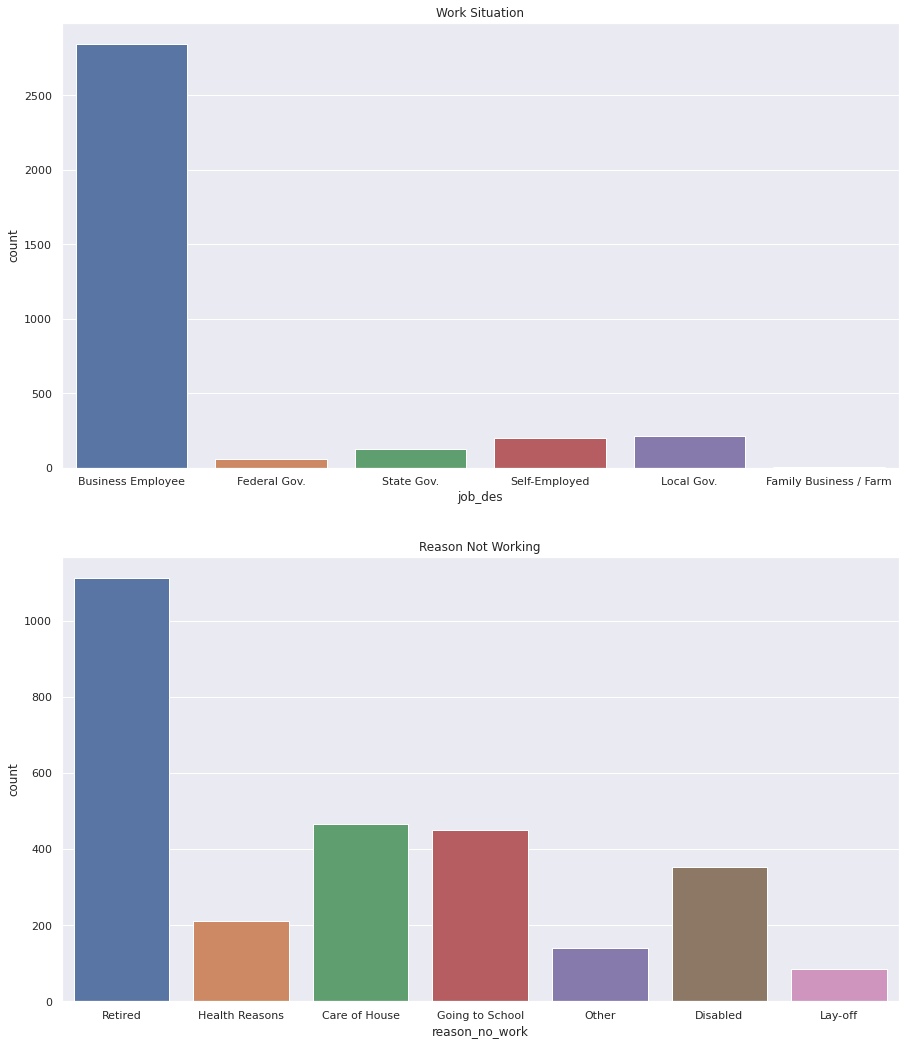

In [34]:
figure, ax = plt.subplots(1, 2, figsize=(15, 18))
ax1 = ax.reshape(2)

Work_Sit = sns.countplot(occ['job_des'], ax=plt.subplot(2,1,1)).set_title("Work Situation")

No_Work = sns.countplot(occ['reason_no_work'], ax=plt.subplot(2,1,2)).set_title("Reason Not Working")



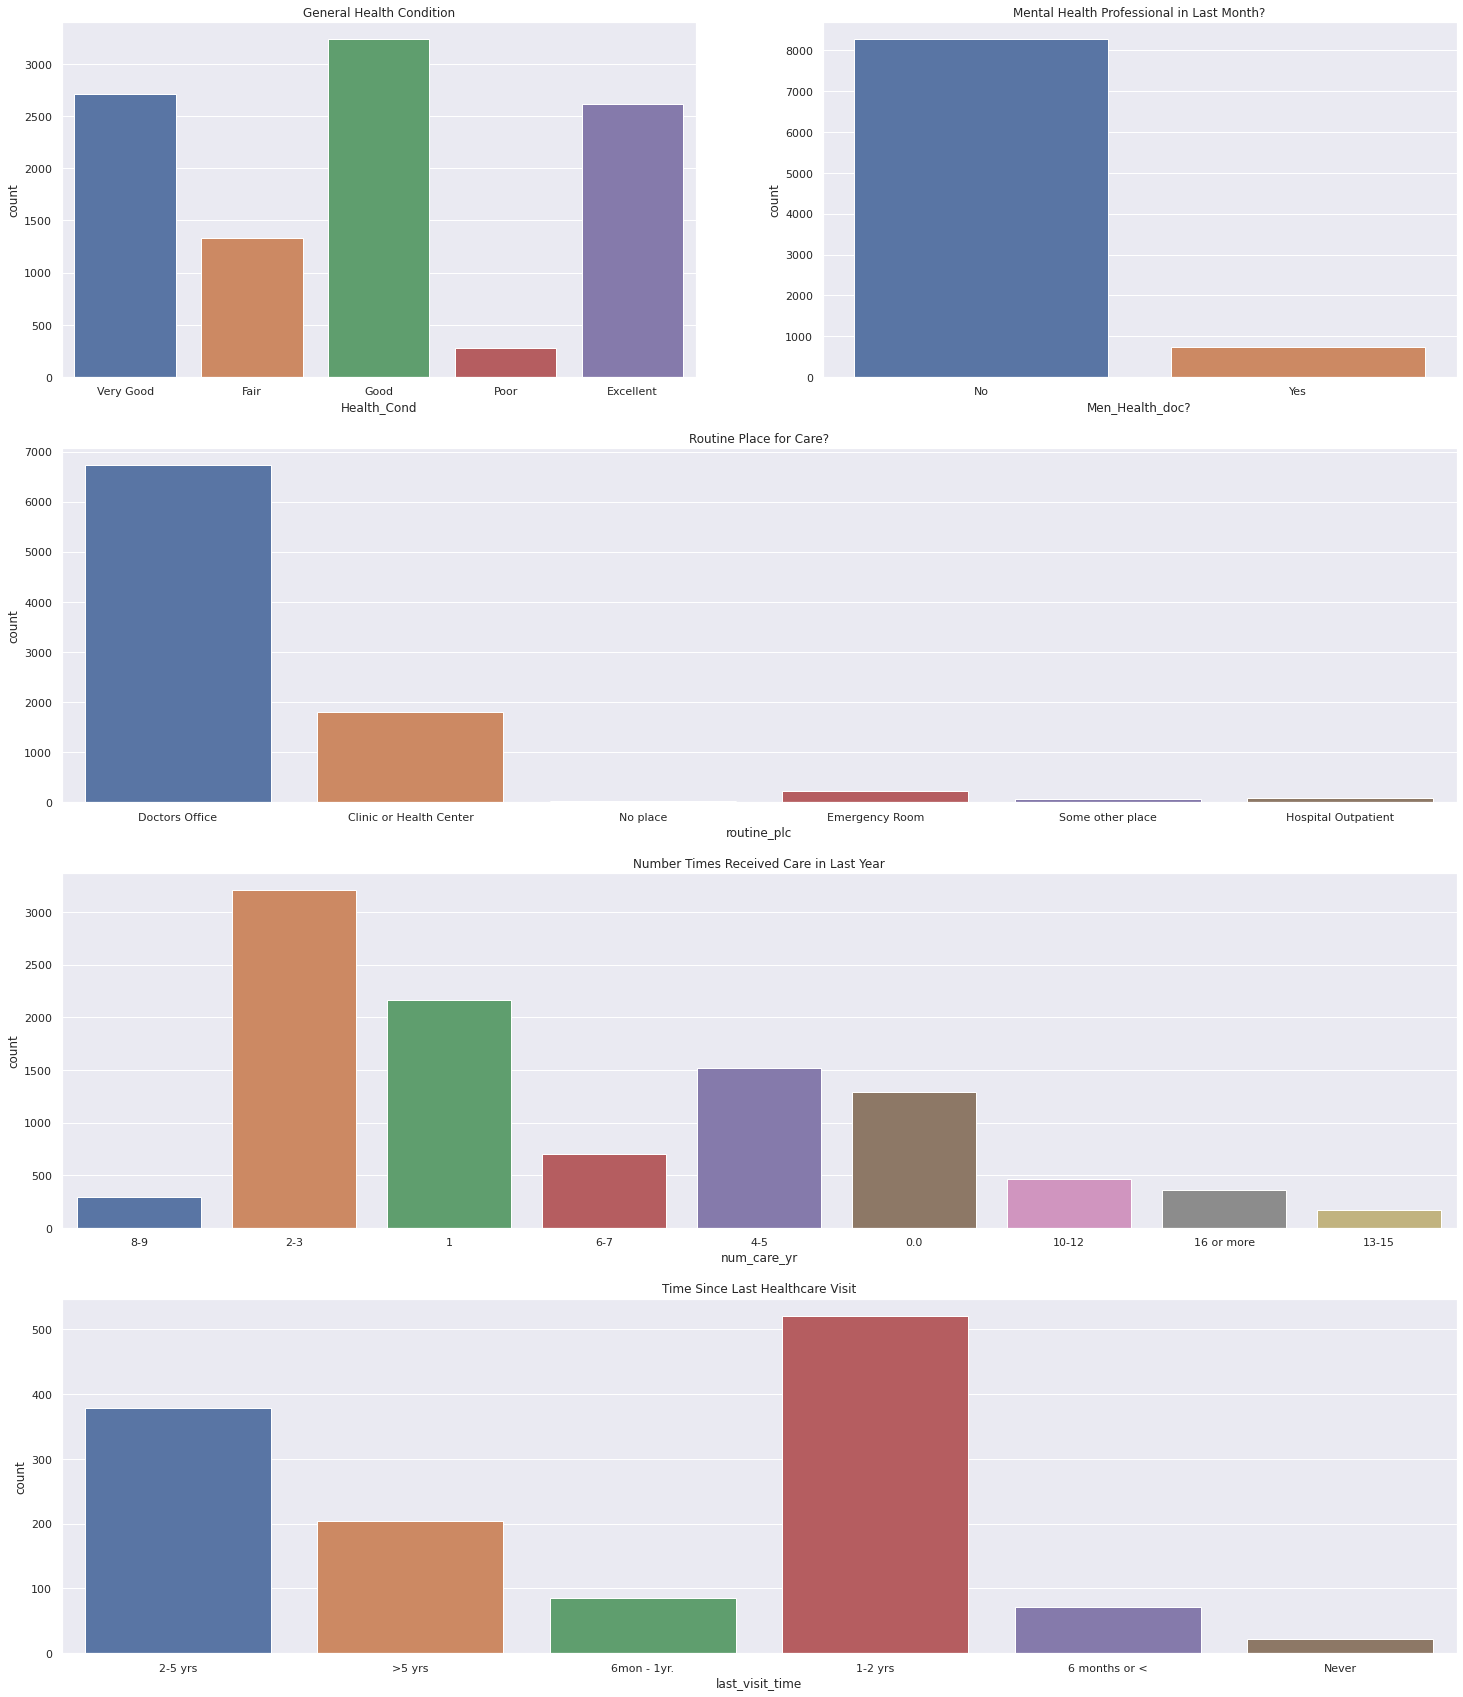

In [35]:
figure, ax = plt.subplots(4, 2, figsize=(25, 30))
ax1 = ax.reshape(8)

Health = sns.countplot(care['Health_Cond'], ax=plt.subplot(4,2,1)).set_title("General Health Condition")

Routine = sns.countplot(care['routine_plc'], ax=plt.subplot(4,2,(3,4))).set_title("Routine Place for Care?")

Number = sns.countplot(care['num_care_yr'], ax=plt.subplot(4,2,(5,6))).set_title("Number Times Received Care in Last Year")

Last_visit = sns.countplot(care['last_visit_time'], ax=plt.subplot(4,2,(7,8))).set_title("Time Since Last Healthcare Visit")

Mental = sns.countplot(care['Men_Health_doc?'], ax=plt.subplot(4,2,2)).set_title("Mental Health Professional in Last Month?")

figure.savefig('Health_Figure.png')

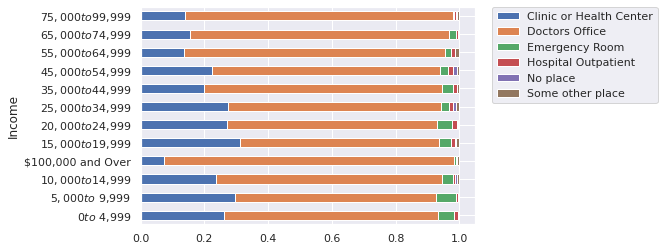

In [36]:
df = pd.crosstab(demo['Income'], care['routine_plc'],normalize= 'index')
ax = df.plot.barh(stacked=True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

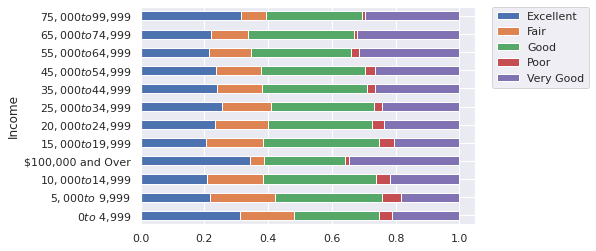

In [37]:
df = pd.crosstab(demo['Income'], care['Health_Cond'],normalize= 'index')
ax = df.plot.barh(stacked=True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

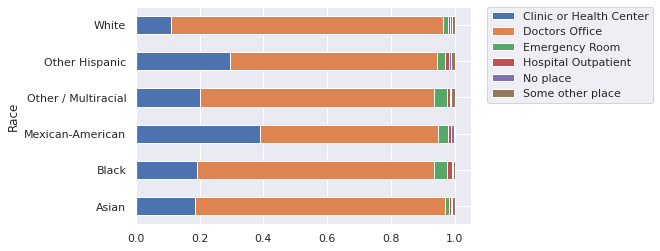

In [38]:
df = pd.crosstab(demo['Race'], care['routine_plc'],normalize= 'index')
ax = df.plot.barh(stacked=True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [39]:
#Insurance info
insure = quest[['HIQ011', 'HIQ031A', 'HIQ031B']]
insure

,HIQ011,HIQ031A,HIQ031B
0,1,NaN,15.0
1,2,NaN,NaN
2,1,14.0,15.0
3,1,14.0,NaN
4,1,14.0,15.0
...,...,...,...
10170,2,NaN,NaN
10171,2,NaN,NaN
10172,1,14.0,NaN
10173,1,NaN,NaN


In [40]:

warnings.simplefilter(action='ignore', category=FutureWarning)

In [41]:
#Covered by health insurance?

insure['HIQ011'] = insure['HIQ011'].replace(7, np.NaN)
insure['HIQ011'] = insure['HIQ011'].replace(9, np.NaN)
insure['HIQ011'] = insure['HIQ011'].replace(1, "Yes")
insure['HIQ011'] = insure['HIQ011'].replace(2, "No")

#Covered by Private Insurance? 
insure['HIQ031A'] = insure['HIQ031A'].replace(77, np.NaN)
insure['HIQ031A'] = insure['HIQ031A'].replace(99, np.NaN)
insure['HIQ031A'] = insure['HIQ031A'].replace(14, "Yes")

#Covered by Medicare?
insure['HIQ031B'] = insure['HIQ031B'].replace(15, "Yes")




<ipython-input-41-a841bb068ce4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insure['HIQ011'] = insure['HIQ011'].replace(7, np.NaN)
<ipython-input-41-a841bb068ce4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insure['HIQ011'] = insure['HIQ011'].replace(9, np.NaN)
<ipython-input-41-a841bb068ce4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [42]:
insure

,HIQ011,HIQ031A,HIQ031B
0,Yes,NaN,Yes
1,No,NaN,NaN
2,Yes,Yes,Yes
3,Yes,Yes,NaN
4,Yes,Yes,Yes
...,...,...,...
10170,No,NaN,NaN
10171,No,NaN,NaN
10172,Yes,Yes,NaN
10173,Yes,NaN,NaN


In [43]:
insure.columns = ['Health Insurance?', 'Private Insurance?', 'Medicare?']
insure

,Health Insurance?,Private Insurance?,Medicare?
0,Yes,NaN,Yes
1,No,NaN,NaN
2,Yes,Yes,Yes
3,Yes,Yes,NaN
4,Yes,Yes,Yes
...,...,...,...
10170,No,NaN,NaN
10171,No,NaN,NaN
10172,Yes,Yes,NaN
10173,Yes,NaN,NaN


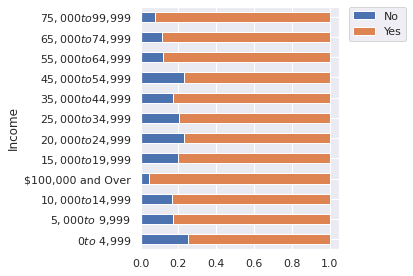

In [44]:
df = pd.crosstab(demo['Income'], insure['Health Insurance?'],normalize= 'index')
ax = df.plot.barh(stacked=True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.savefig('Income_vs_Insurance.png')

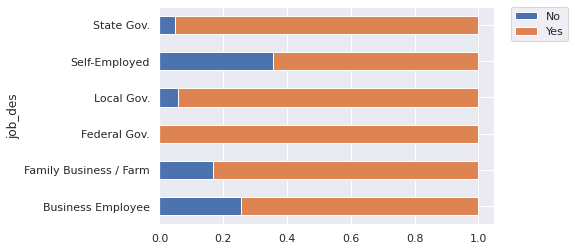

In [45]:
df = pd.crosstab(occ['job_des'], insure['Health Insurance?'],normalize= 'index')
ax = df.plot.barh(stacked=True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

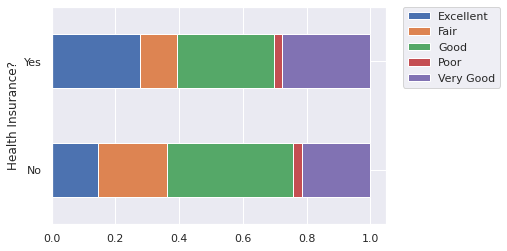

In [46]:
df = pd.crosstab(insure['Health Insurance?'], care['Health_Cond'],normalize= 'index')
ax = df.plot.barh(stacked=True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

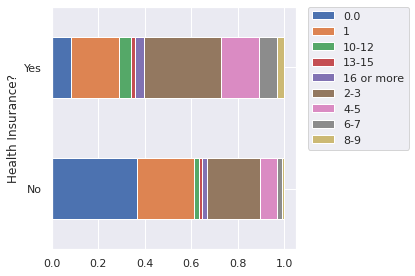

In [52]:
df = pd.crosstab(insure['Health Insurance?'], care['num_care_yr'],normalize= 'index')
ax = df.plot.barh(stacked=True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.savefig("Insurance_vs_Care_Times.png")

In [48]:
demo.to_csv('../data/demographics.csv')

In [49]:
#Save certain data to new dataframe for prediction model
data = pd.DataFrame()
data['income'] = demo["Income"]  
data['Health_Insure'] = insure['Health Insurance?'] 
data['Health_cond'] = care['Health_Cond']
data['routine_plc']= care['routine_plc']
data['num_care_yr'] = care['num_care_yr'] 
data['last_visit_time'] = care['last_visit_time']

In [50]:
data

,income,Health_Insure,Health_cond,routine_plc,num_care_yr,last_visit_time
0,"$15,000 to $19,999",Yes,Very Good,Doctors Office,8-9,NaN
1,"$35,000 to $44,999",No,Fair,Doctors Office,8-9,NaN
2,"$65,000 to $74,999",Yes,Good,Doctors Office,2-3,NaN
3,"$55,000 to $64,999",Yes,Very Good,NaN,1,NaN
4,"$100,000 and Over",Yes,Poor,Doctors Office,6-7,NaN
...,...,...,...,...,...,...
10170,NaN,No,Fair,NaN,1,NaN
10171,"$45,000 to $54,999",No,Very Good,Doctors Office,0,6mon - 1yr.
10172,"$35,000 to $44,999",Yes,Good,Doctors Office,8-9,NaN
10173,"$25,000 to $34,999",Yes,Excellent,Doctors Office,0,6mon - 1yr.


In [51]:
#Save data to cvs for future use
data.to_csv('../data/all.csv')